# AMATH 342 HW 4

<p> <b> Avinash Joshi </b> </p>
<p> <b> AMATH 342 Wi 22 </b> </p>
<p> <b> Prof. Shea-Brown </b> </p>
<p> <b> 7 February 2022 </b> </p>

## Section $I$

In [396]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.dpi']=400

The Voltage readings at t[30] are 10.000008841724783 and 10.000046676636973


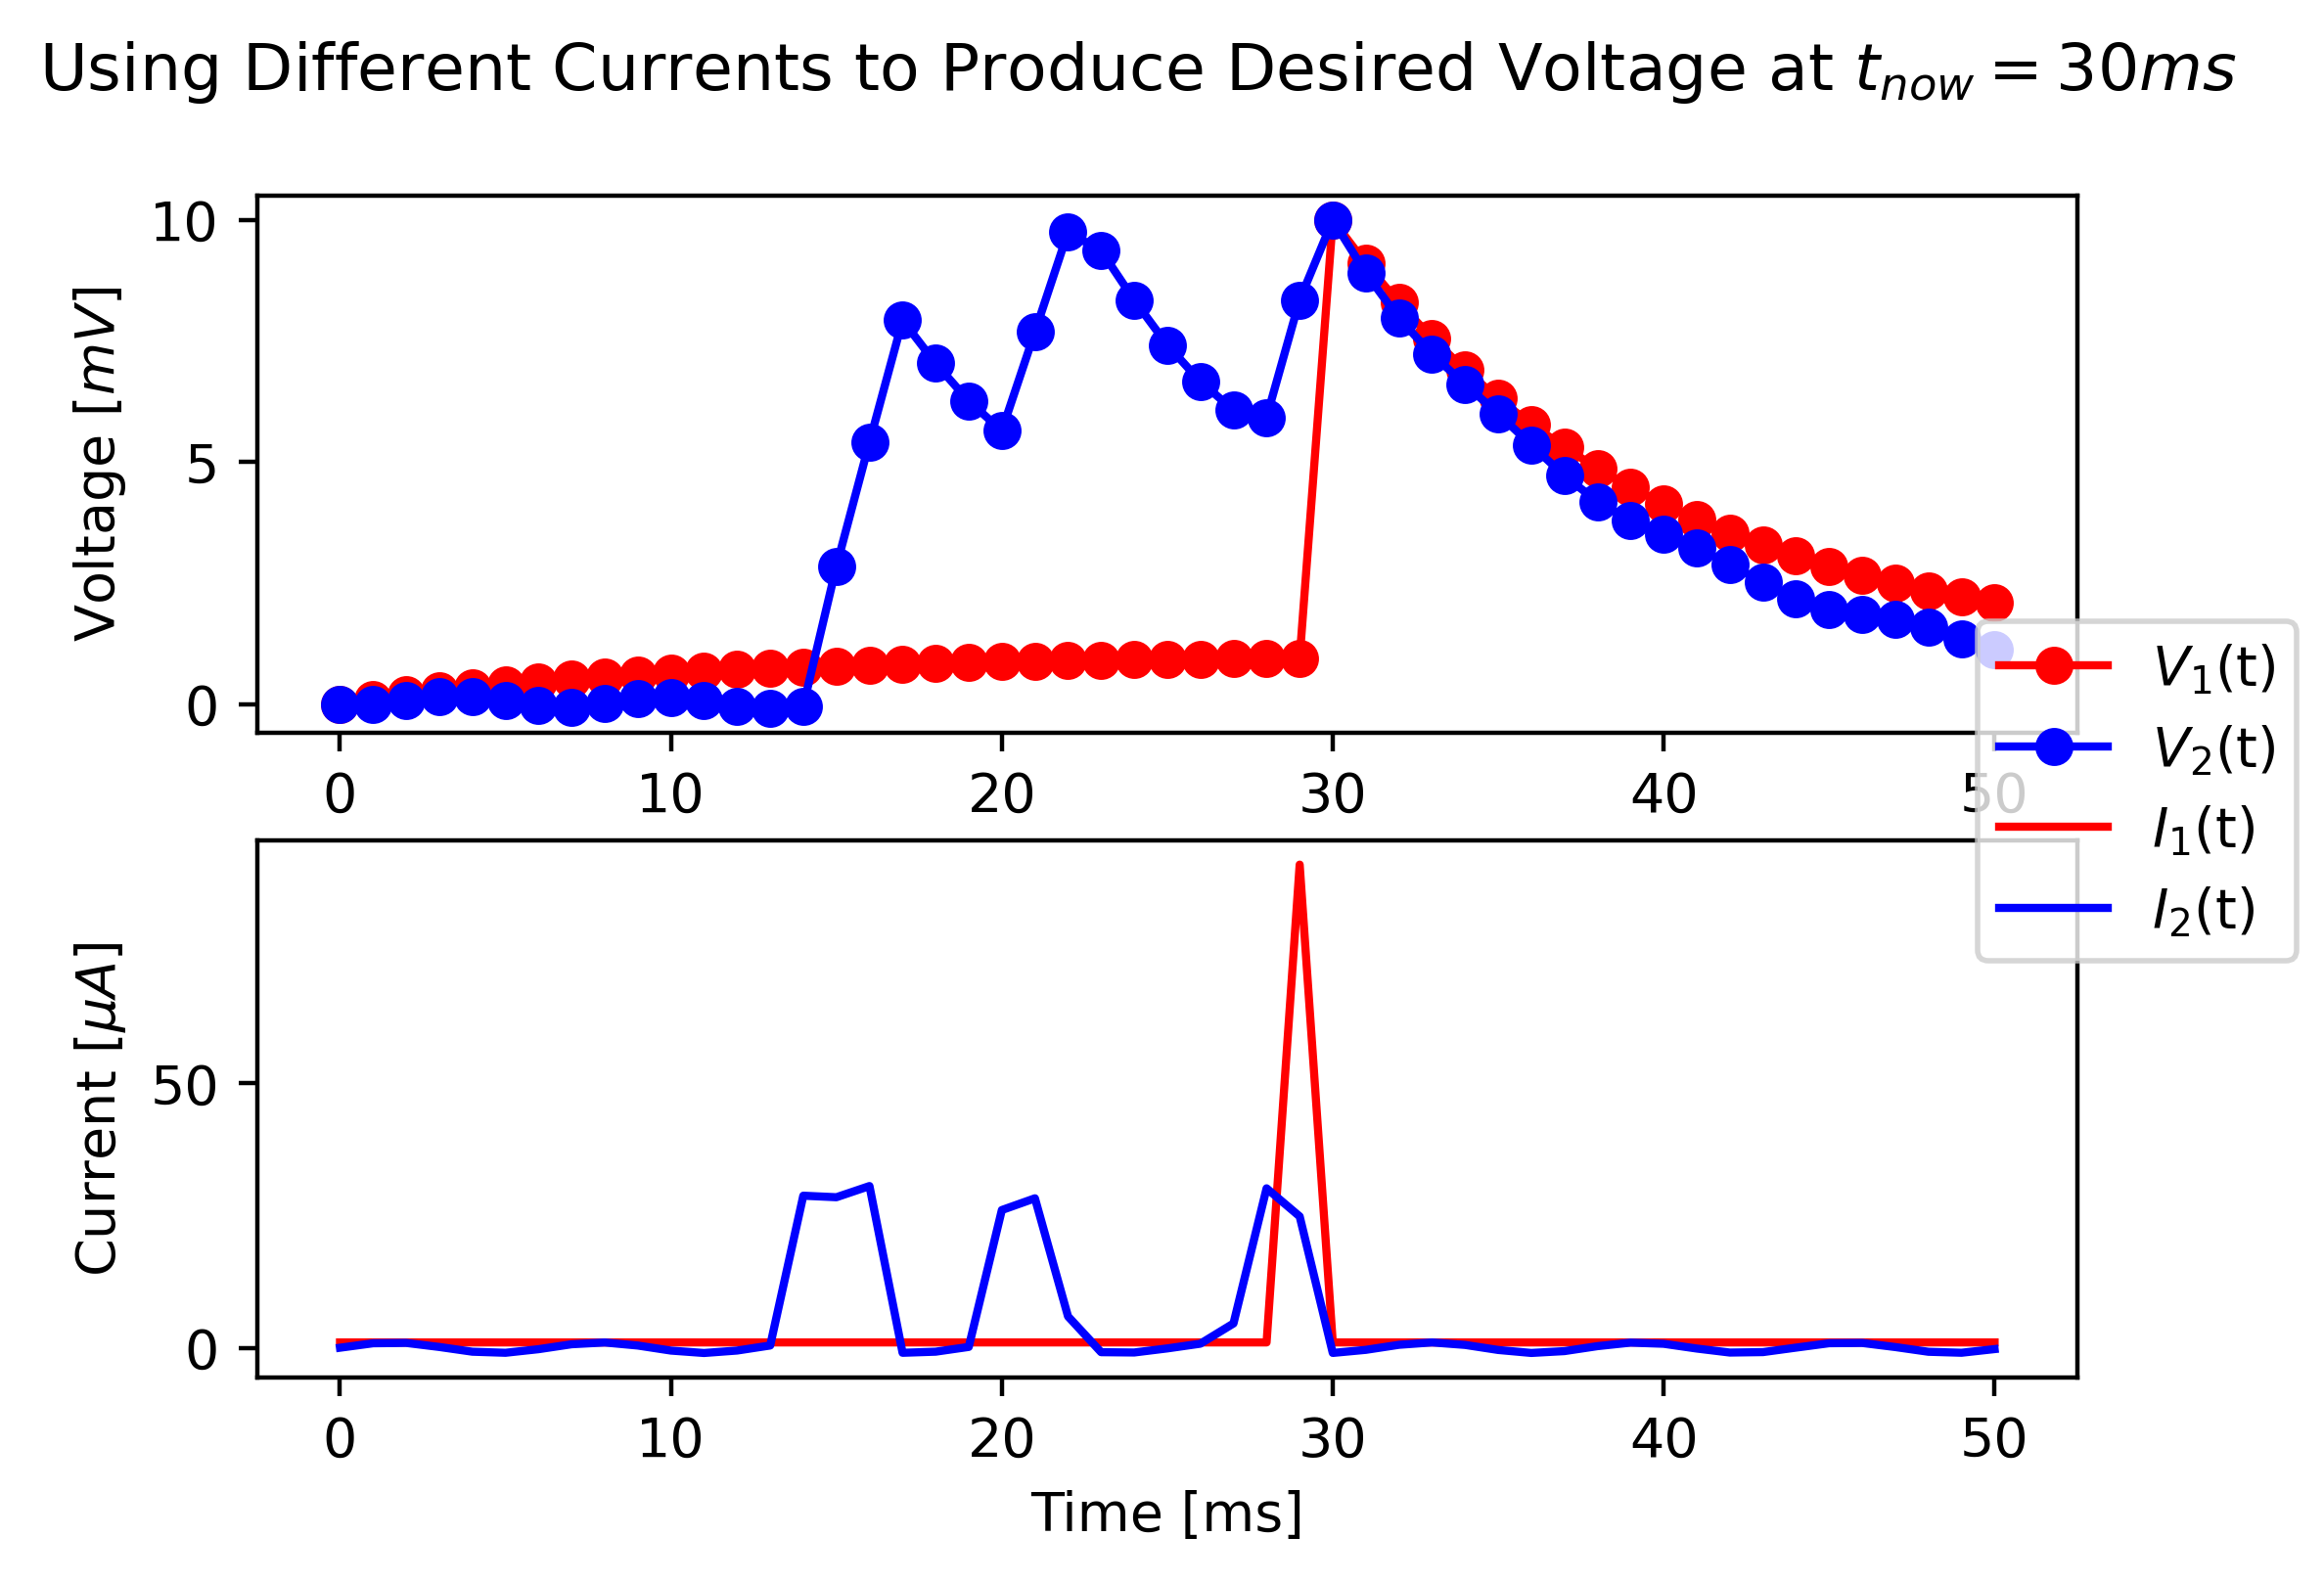

In [397]:
deltat = 1
Tmax = 50
R = 1
C = 10
tlist = np.linspace(0, Tmax, int(Tmax/deltat) + 1)
Vlist1 = np.zeros(len(tlist))
Vlist2 = np.zeros(len(tlist))
V0 = 0
Vlist1[0] = V0
Vlist2[0] = V0
Iapplist1 = np.ones(len(tlist))
Iapplist1[29] = 91.424
Iapplist2 = np.sin(tlist)
for ii in np.array([14,15,16,20,21,22,27,28,29]):
    Iapplist2[ii] = 30.6198*abs(np.sin(ii**2))
for i in range(len(tlist)-1):
    t=tlist[i]
    Vlist1[i+1]=Vlist1[i] + (-Vlist1[i]/(R*C) + Iapplist1[i]/C )*deltat
    Vlist2[i+1]=Vlist2[i] + (-Vlist2[i]/(R*C) + Iapplist2[i]/C )*deltat
print('The Voltage readings at t[30] are',Vlist1[30],'and', Vlist2[30])
fig, ax = plt.subplots(2)
fig.suptitle('Using Different Currents to Produce Desired Voltage at $t_{now} = 30ms$')
ax[0].plot(tlist, Vlist1, 'ro-', label = '$V_1$(t)') 
ax[0].plot(tlist, Vlist2, 'bo-', label = '$V_2$(t)')
ax[0].set_ylabel('Voltage $[mV]$')
ax[1].set_ylabel('Current $[\mu A]$')
ax[1].set_xlabel('Time [ms]')
ax[1].plot(tlist, Iapplist1, 'r-', label ='$I_1$(t)')
ax[1].plot(tlist, Iapplist2, 'b-', label = '$I_2$(t)')
fig.legend(loc = 'center right')
plt.show()

The explicit solution for $V(t)$, with $V(0) = 0$, is $V(T) = \int_0^t \frac{e^{-(t')/RC}}{C}I_A(t-t')dt'$. With a discrete space defined by a uniform time step, $\Delta t$, the integral is instead approximated with a Reimman sum. This gives the first major clue into why multiple current are able to lead to any $V(t_{now})$: the current, $I_A(t-t')$, weighted by a kernel, $\kappa(t')$, is summed over the entire time period. This implies that there are an infinite amount of traces which can be tailored to equal some $V(t_{now})$ because all that matters is that at some $t_{now}$ the sum of the weighted currents at each time step evalutes to a desired voltage.

This property of the discretization, or even in a continuous time domain, of summation is why the two chosen currents, $I_1(t)$ and $I_2(t)$, while very different when graphed, equate to the same voltage of $V(30) \approx 10$.

## Section $II$

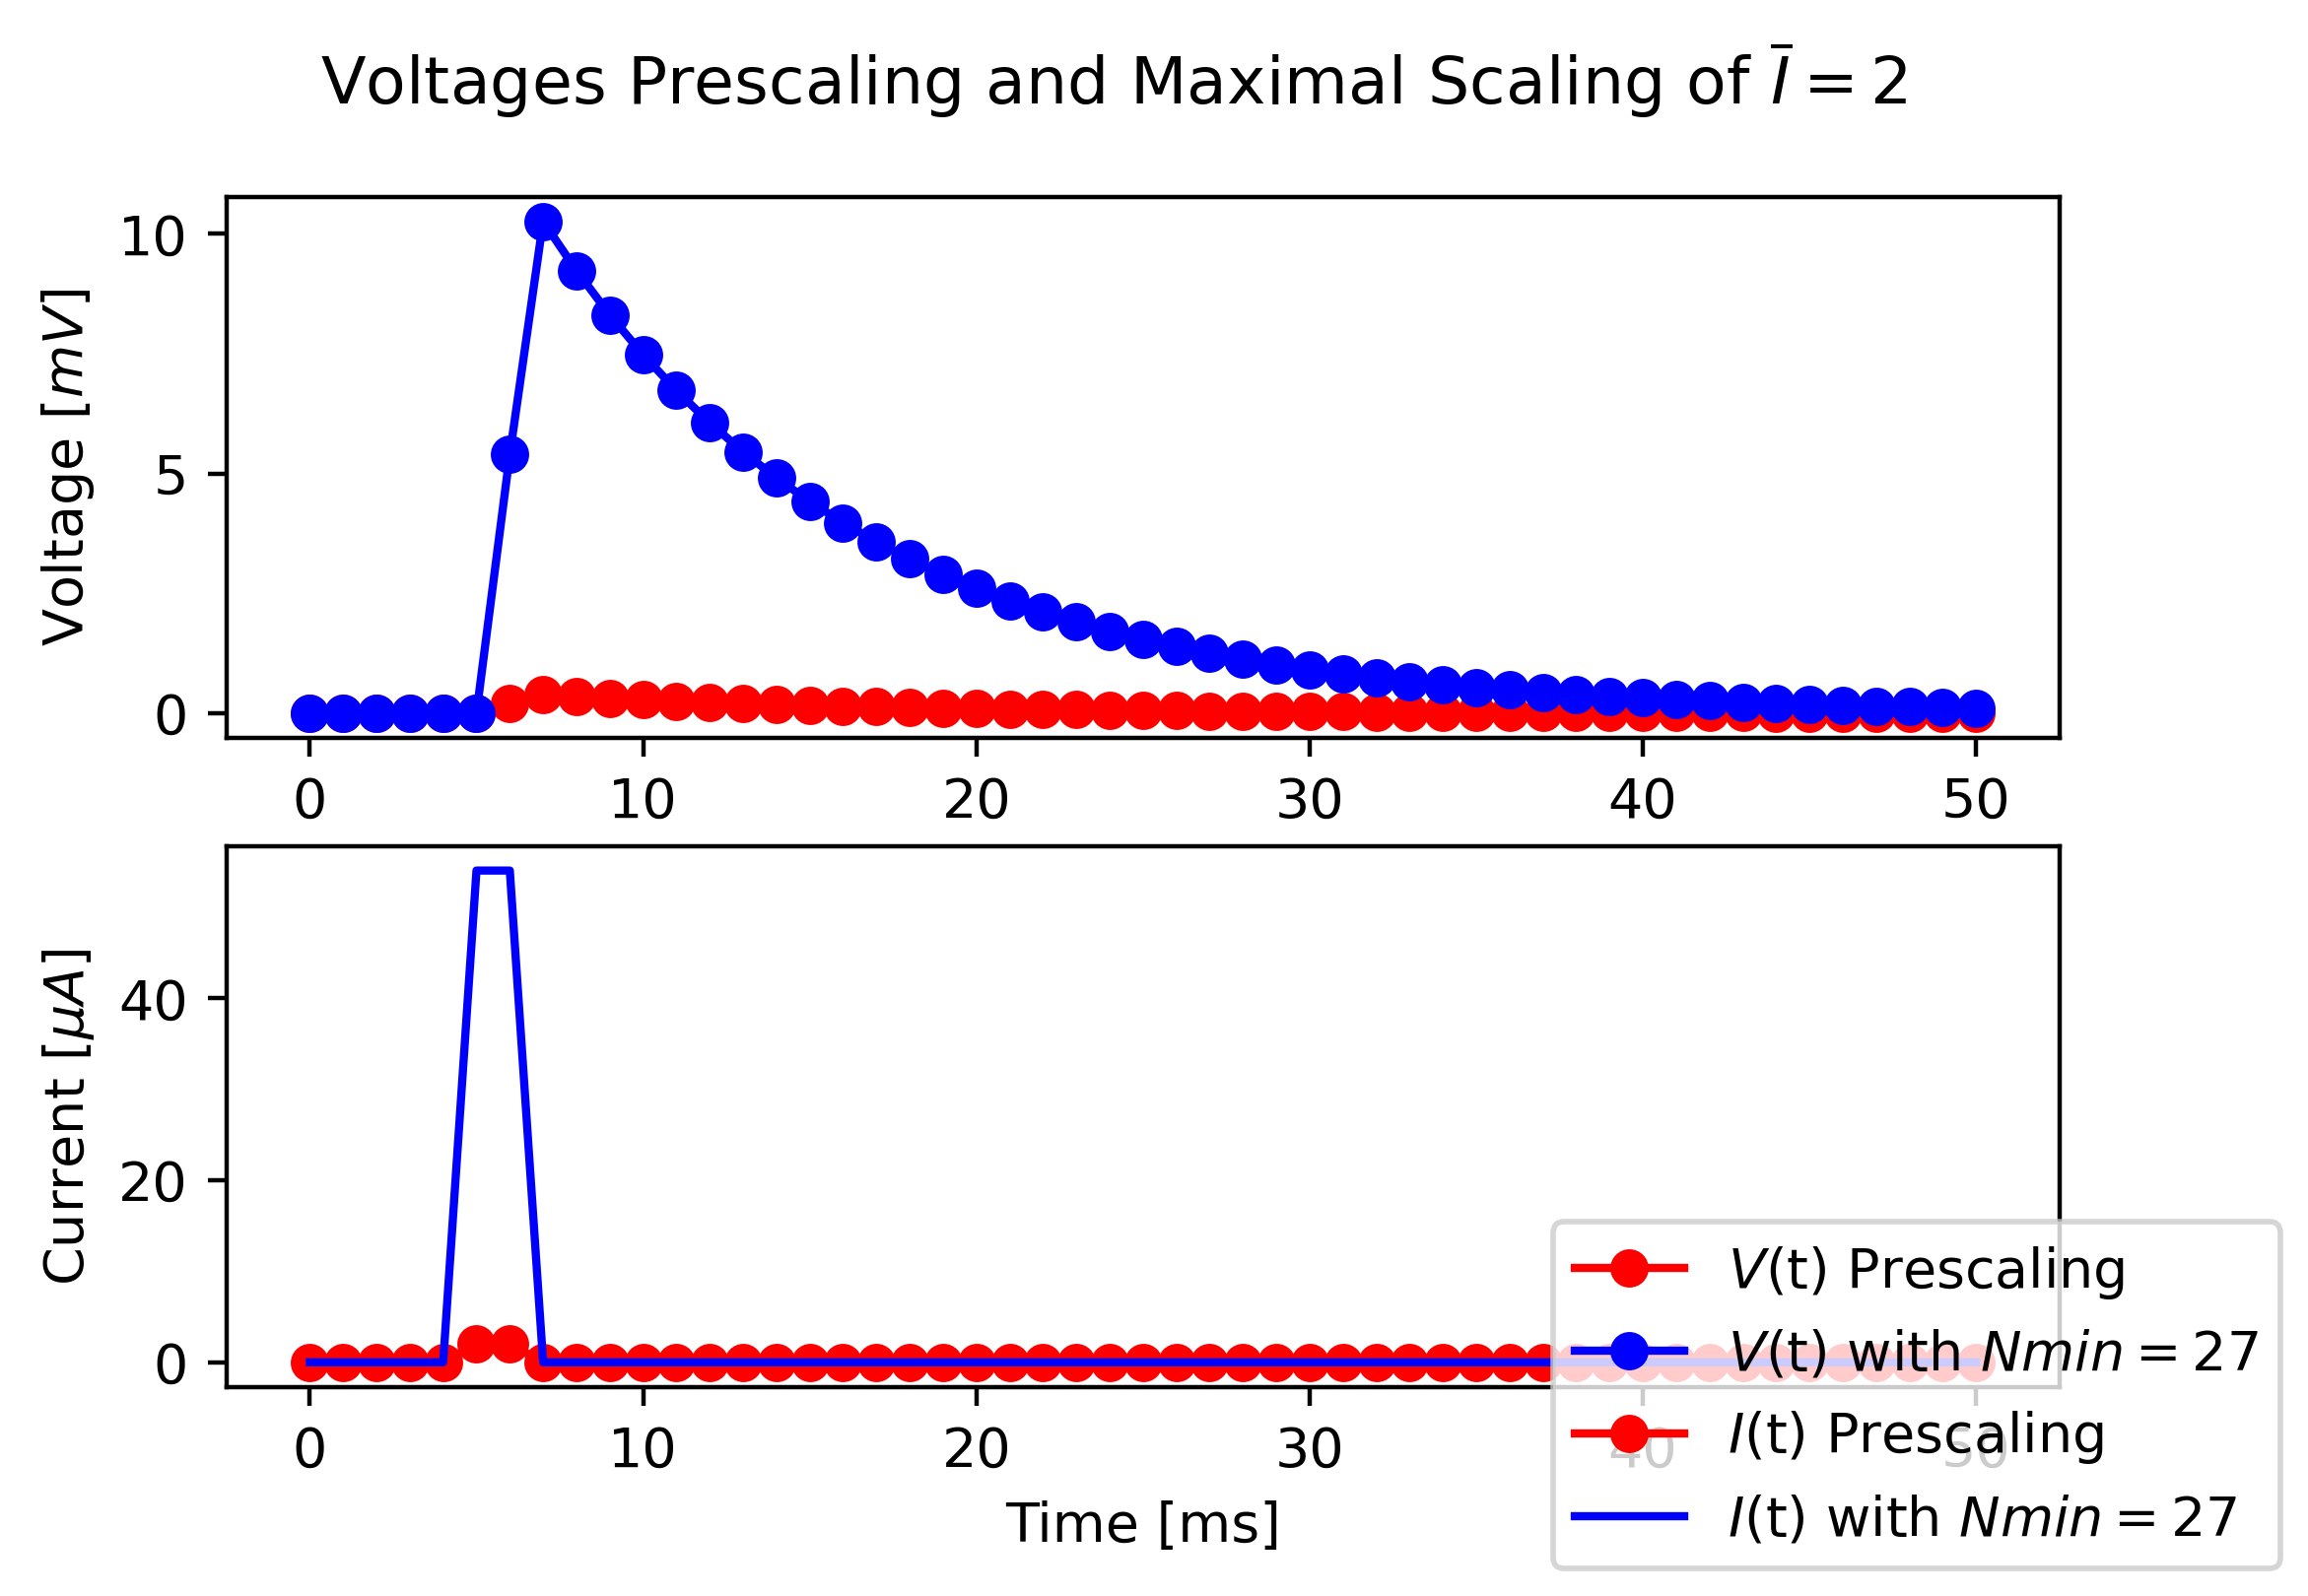

In [398]:
delta1 = 1
tlist = np.linspace(0, Tmax, int(Tmax/deltat) + 1)
Vmax = np.zeros((1))
f = []
N = [1]
V0 = 0
count = 0
fig, ax = plt.subplots(2)
fig.suptitle('Voltages Prescaling and Maximal Scaling of $\overline{I} = 2$')

while Vmax[count] < 10:
    Vlist = np.zeros(len(tlist))
    Vlist[0] = V0
    Ibarlist = np.zeros(len(tlist))
    Ibar = 2
    Ibarlist[5] = Ibar * (N[count])
    Ibarlist[5+delta1] = Ibar * (N[count])
    for i in range(len(tlist)-1):
        t=tlist[i]
        Vlist[i+1]=Vlist[i] + (-Vlist[i]/(R*C) + Ibarlist[i]/C )*delta1;
    if count == 0:
        ax[0].plot(tlist, Vlist, 'ro-', label = '$V$(t) Prescaling') 
        ax[0].set_ylabel('Voltage $[mV]$')
        ax[1].set_ylabel('Current $[\mu A]$')
        ax[1].set_xlabel('Time [ms]')
        ax[1].plot(tlist, Ibarlist, 'ro-', label ='$I$(t) Prescaling')
    Vmax = np.append(Vmax, max(Vlist))
    f = np.append(f, max(Vlist)/10)
    count += 1
    N = np.append(N, count+1)

ax[0].plot(tlist, Vlist, 'bo-', label = '$V$(t) with $Nmin = {}$'.format(N[-2]))
ax[0].set_ylabel('Voltage $[mV]$')
ax[1].set_ylabel('Current $[\mu A]$')
ax[1].set_xlabel('Time [ms]')
ax[1].plot(tlist, Ibarlist, 'b-', label ='$I$(t) with $Nmin = {}$'.format(N[-2]))
fig.legend(loc = 'lower right')
plt.show()

With $\bar{I} = 2$ and $\Delta_1 = 1$, the peak voltage is $~0.38 V$ with a fractional threshold $f = 0.038$

The peak voltage $V(mV)$ over $N \in {1,\ldots,27}$ 1 ms impluses are:

In [399]:
print(Vmax[1:])

[ 0.38  0.76  1.14  1.52  1.9   2.28  2.66  3.04  3.42  3.8   4.18  4.56
  4.94  5.32  5.7   6.08  6.46  6.84  7.22  7.6   7.98  8.36  8.74  9.12
  9.5   9.88 10.26]


The impulses fractional threshold over $N \in {1,\ldots,27}$ 1 ms impluses with $f_1 = 0.038$ are:

In [400]:
print(f)

[0.038 0.076 0.114 0.152 0.19  0.228 0.266 0.304 0.342 0.38  0.418 0.456
 0.494 0.532 0.57  0.608 0.646 0.684 0.722 0.76  0.798 0.836 0.874 0.912
 0.95  0.988 1.026]


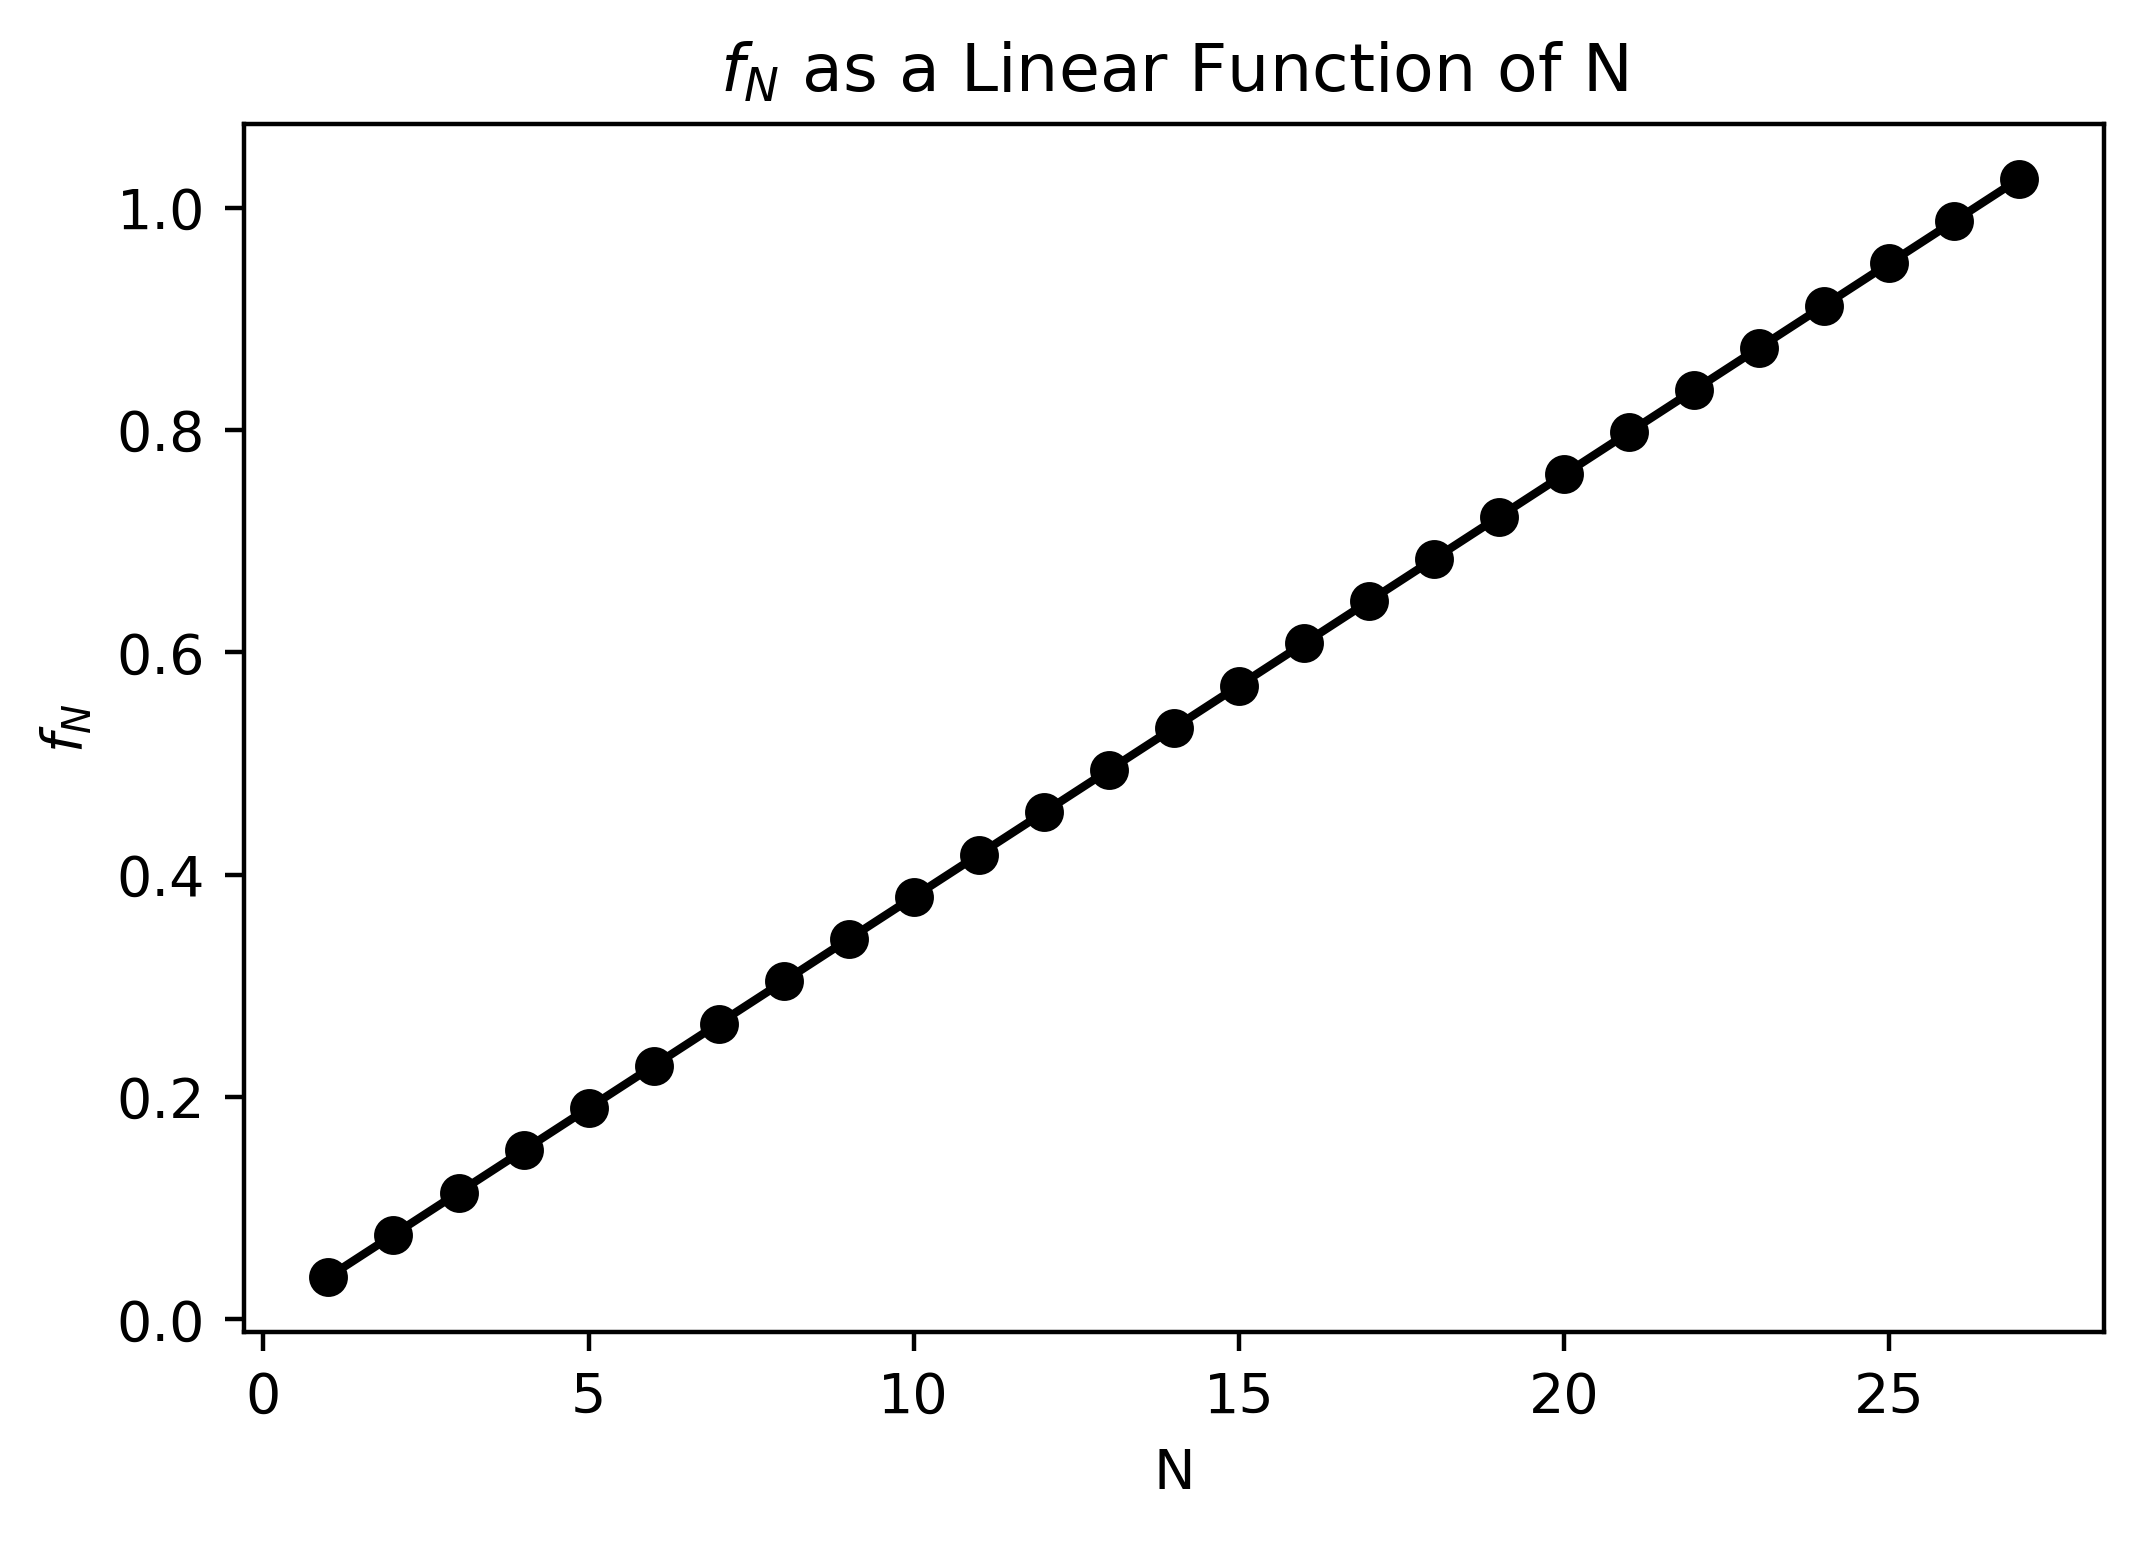

In [401]:
plt.plot(N[:-1], f, 'ko-')
plt.title('$f_N$ as a Linear Function of N')
plt.xlabel('N')
plt.ylabel('$f_N$')
plt.show()

The relationship between N and f_N is linear, so as more impluses arrive simultaneously, the fractional threshold proportionality increases to one, where, subsuquently, a spike is generated. This occurs when there are $N_{min} = 27$ impulses arriving simultaneously of width $\Delta_1 = 1 ms$. Consquently, $N_{min} = \frac{1}{f}$, so $N_{min}$ and $f_{N=1}$ or simply $f$ are inversly proportional.

Computing $N_{min}$ with $V_0 = 0$ analytically using Reimann Sums is as follows:

$$V(t) = \int_0^t \frac{e^{-(t')/RC}}{C}I_A(t-t')dt'$$
$$f = \frac{max[V(T)]}{V_{threshold}} = \frac{\int_0^t \frac{e^{-(t')/RC}}{C}I_A(t-t')dt'}{10} = \frac{1}{10}e^{-\frac{t}{RC}}\frac{1}{C}\sum^{t}_{s=0}e^{\frac{s}{RC}}I_A(s)$$
$$f_N = \frac{\int_0^t \frac{e^{-(t')/RC}}{C} N I_A(t-t')dt'}{10} $$
$$f_N = N \frac{\int_0^t \frac{e^{-(t')/RC}}{C} I_A(t-t')dt'}{10} $$
$$f_N = Nf$$
$$N = \frac{f_N}{f}$$

$$N \approx \frac{1}{\frac{1}{10}max(e^{-\frac{t}{RC}}\frac{1}{C}\sum^{t}_{s=0}e^{\frac{s}{RC}}I_A(s))}$$
$$\sum^{50}_{s=0}e^{\frac{s}{10}}I_A(s) =  2(e^{\frac{5}{10}} + e^{\frac{6}{10}})$$
$$\frac{1}{10}max(e^{-\frac{t}{RC}}\frac{1}{C}\sum^{t}_{s=0}e^{\frac{s}{RC}}I_A(s)) = \frac{1}{50}e^{-\frac{6}{10}}\left(e^{\frac{5}{10}}+e^{\frac{6}{10}}\right)$$
$$N_{min} = \frac{1}{\frac{1}{50}e^{-\frac{6}{10}}\left(e^{\frac{5}{10}}+e^{\frac{6}{10}}\right)} \approx 27$$

The less laborious way is to $N_{min}$ using $f_{N=1}$ computed in conjungtion with Euler's Method. $N_{min} \approx \frac{f_N}{f_1} = \frac{1}{.038} \approx 27$

Thanks for reading!

- Avi